# 14.1. Manipulating and visualizing graphs with NetworkX

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10  # Number of nodes in the graph.
# Each node is connected to the two next nodes,
# in a circular fashion.
adj = [(i, (i + 1) % n) for i in range(n)]
adj += [(i, (i + 2) % n) for i in range(n)]

In [3]:
g = nx.Graph(adj)

In [4]:
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
print(g.edges())

[(0, 1), (0, 9), (0, 2), (0, 8), (1, 2), ...,
 (6, 8), (7, 8), (7, 9), (8, 9)]


In [6]:
print(nx.adjacency_matrix(g))

  (0, 1)    1
  (0, 2)    1
  (0, 8)    1
  (0, 9)    1
  (1, 0)    1
  ...
  (8, 9)    1
  (9, 0)    1
  (9, 1)    1
  (9, 7)    1
  (9, 8)    1


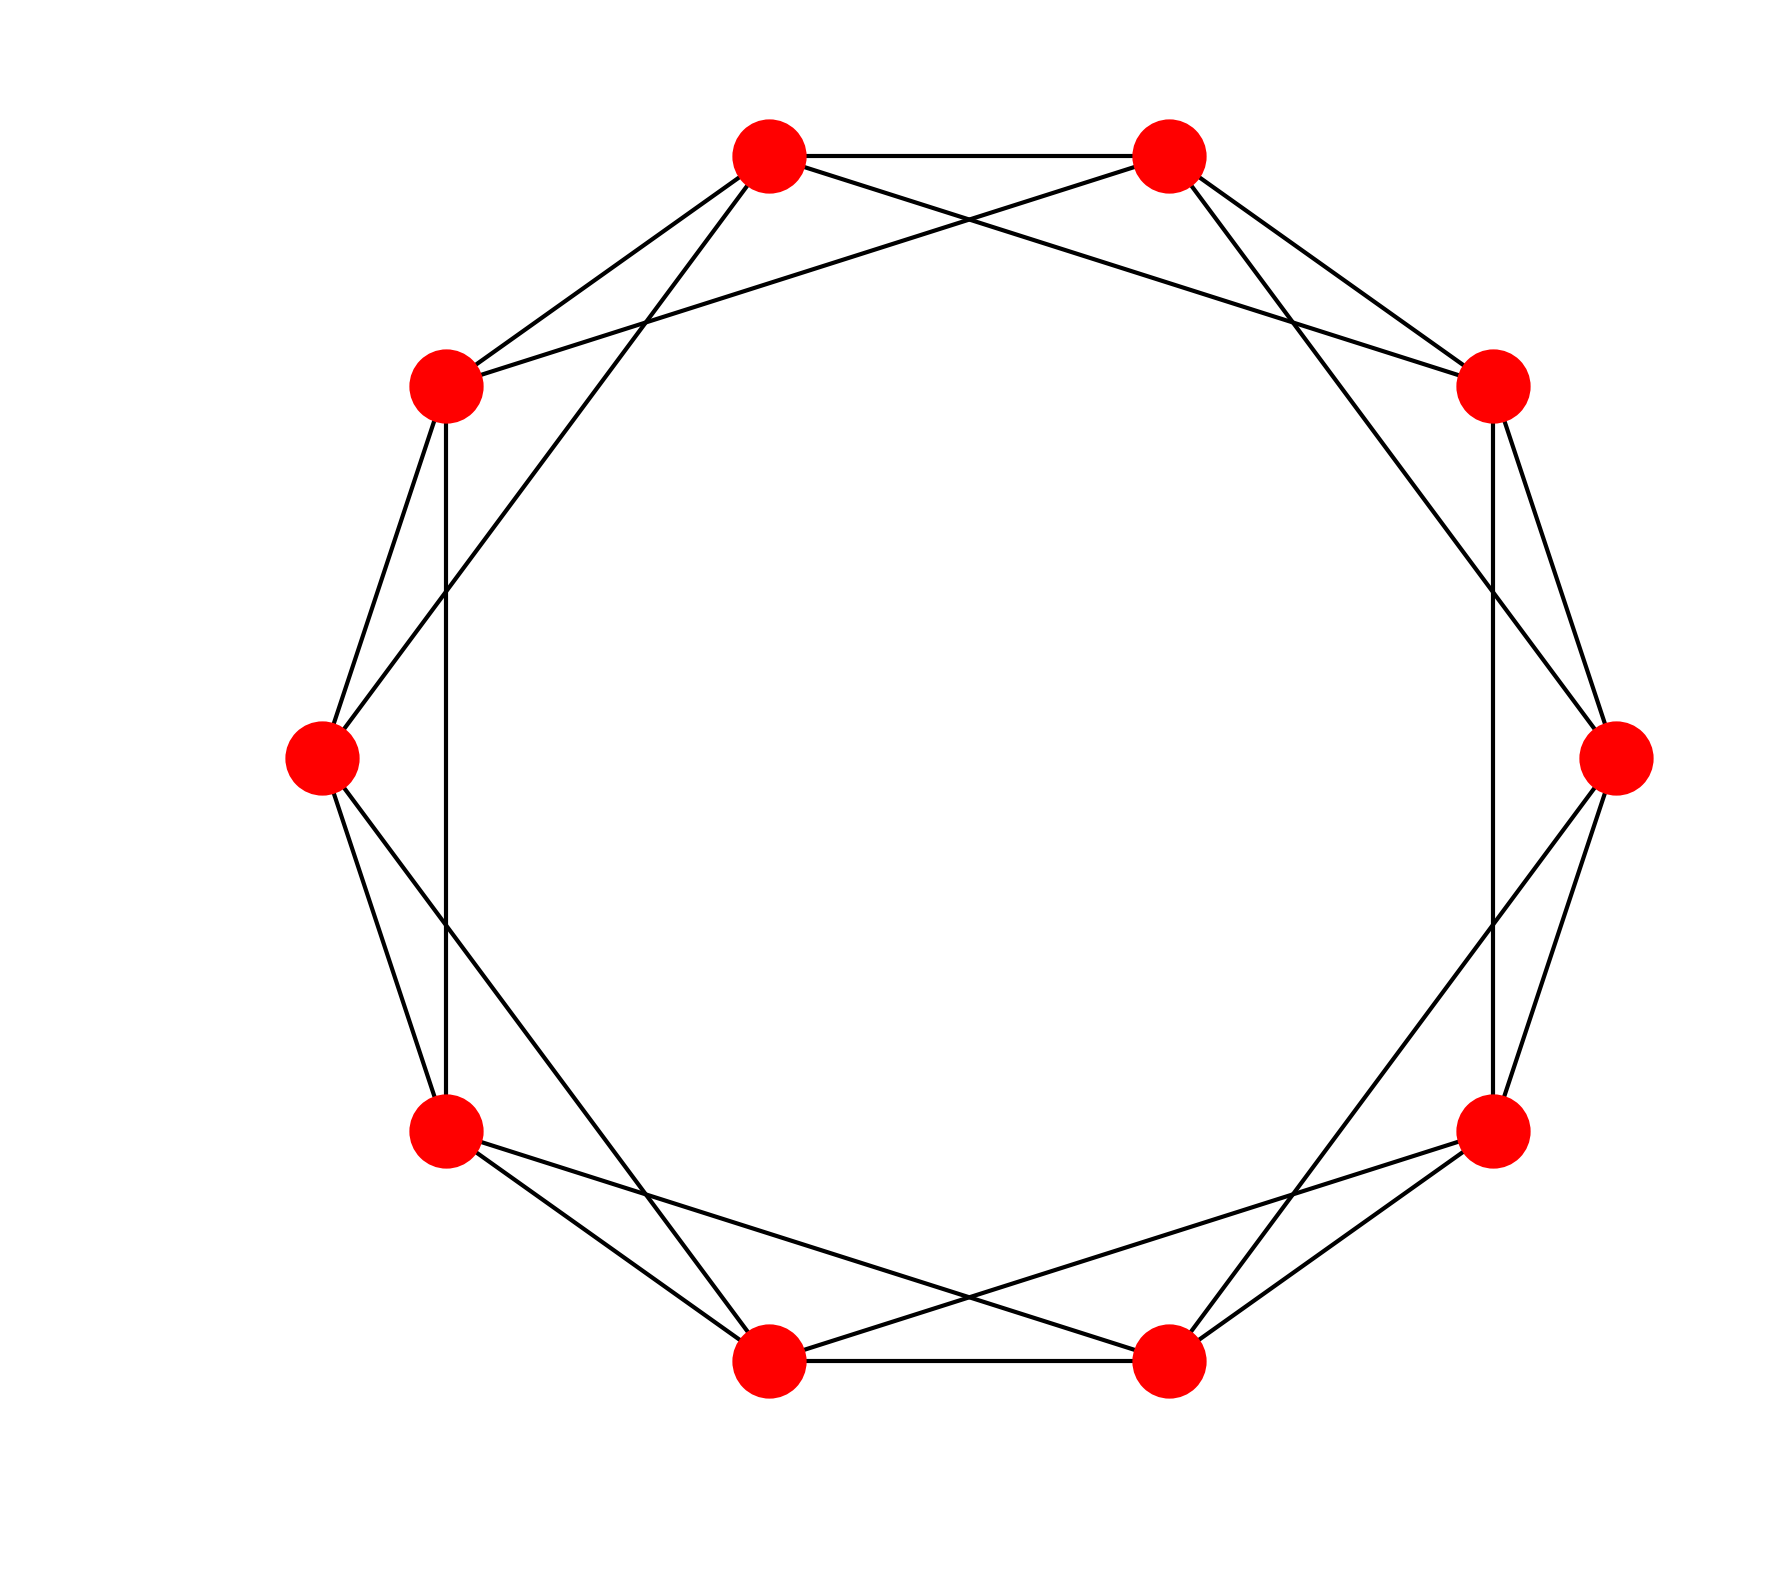

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_circular(g, ax=ax)

In [8]:
g.add_node(n, color='#fcff00')
# We add an edge from every existing
# node to the new node.
for i in range(n):
    g.add_edge(i, n)

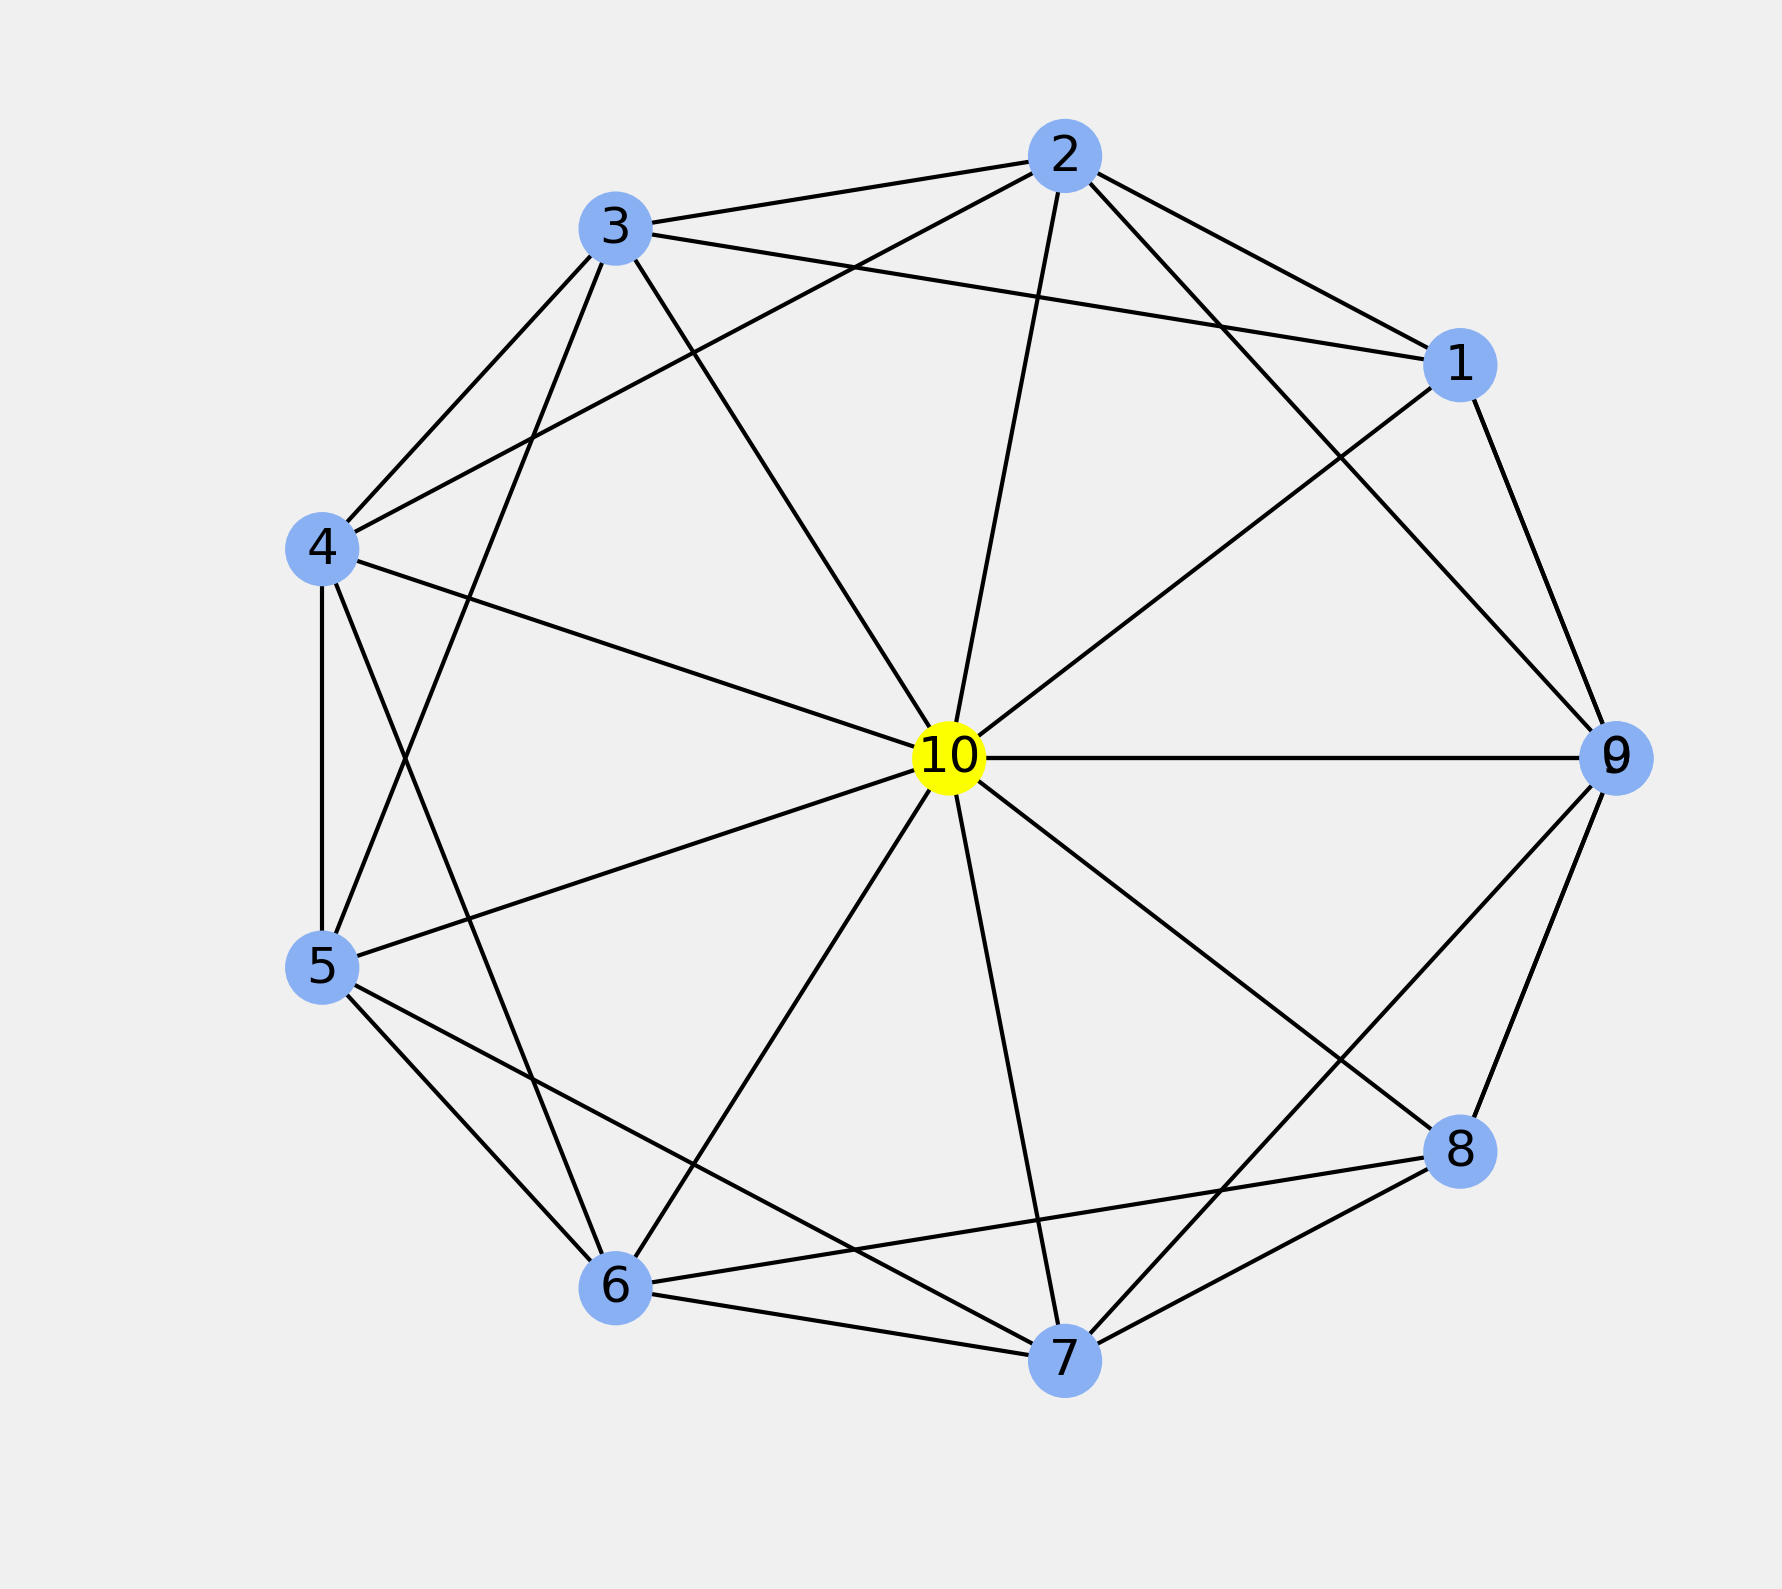

In [9]:
# We define custom node positions on a circle
# except the last node which is at the center.
t = np.linspace(0., 2 * np.pi, n)
pos = np.zeros((n + 1, 2))
pos[:n, 0] = np.cos(t)
pos[:n, 1] = np.sin(t)

# A node's color is specified by its 'color'
# attribute, or a default color if this attribute
# doesn't exist.
color = [g.node[i].get('color', '#88b0f3')
         for i in range(n + 1)]

# We now draw the graph with matplotlib.
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, pos=pos, node_color=color, ax=ax)
ax.set_axis_off()

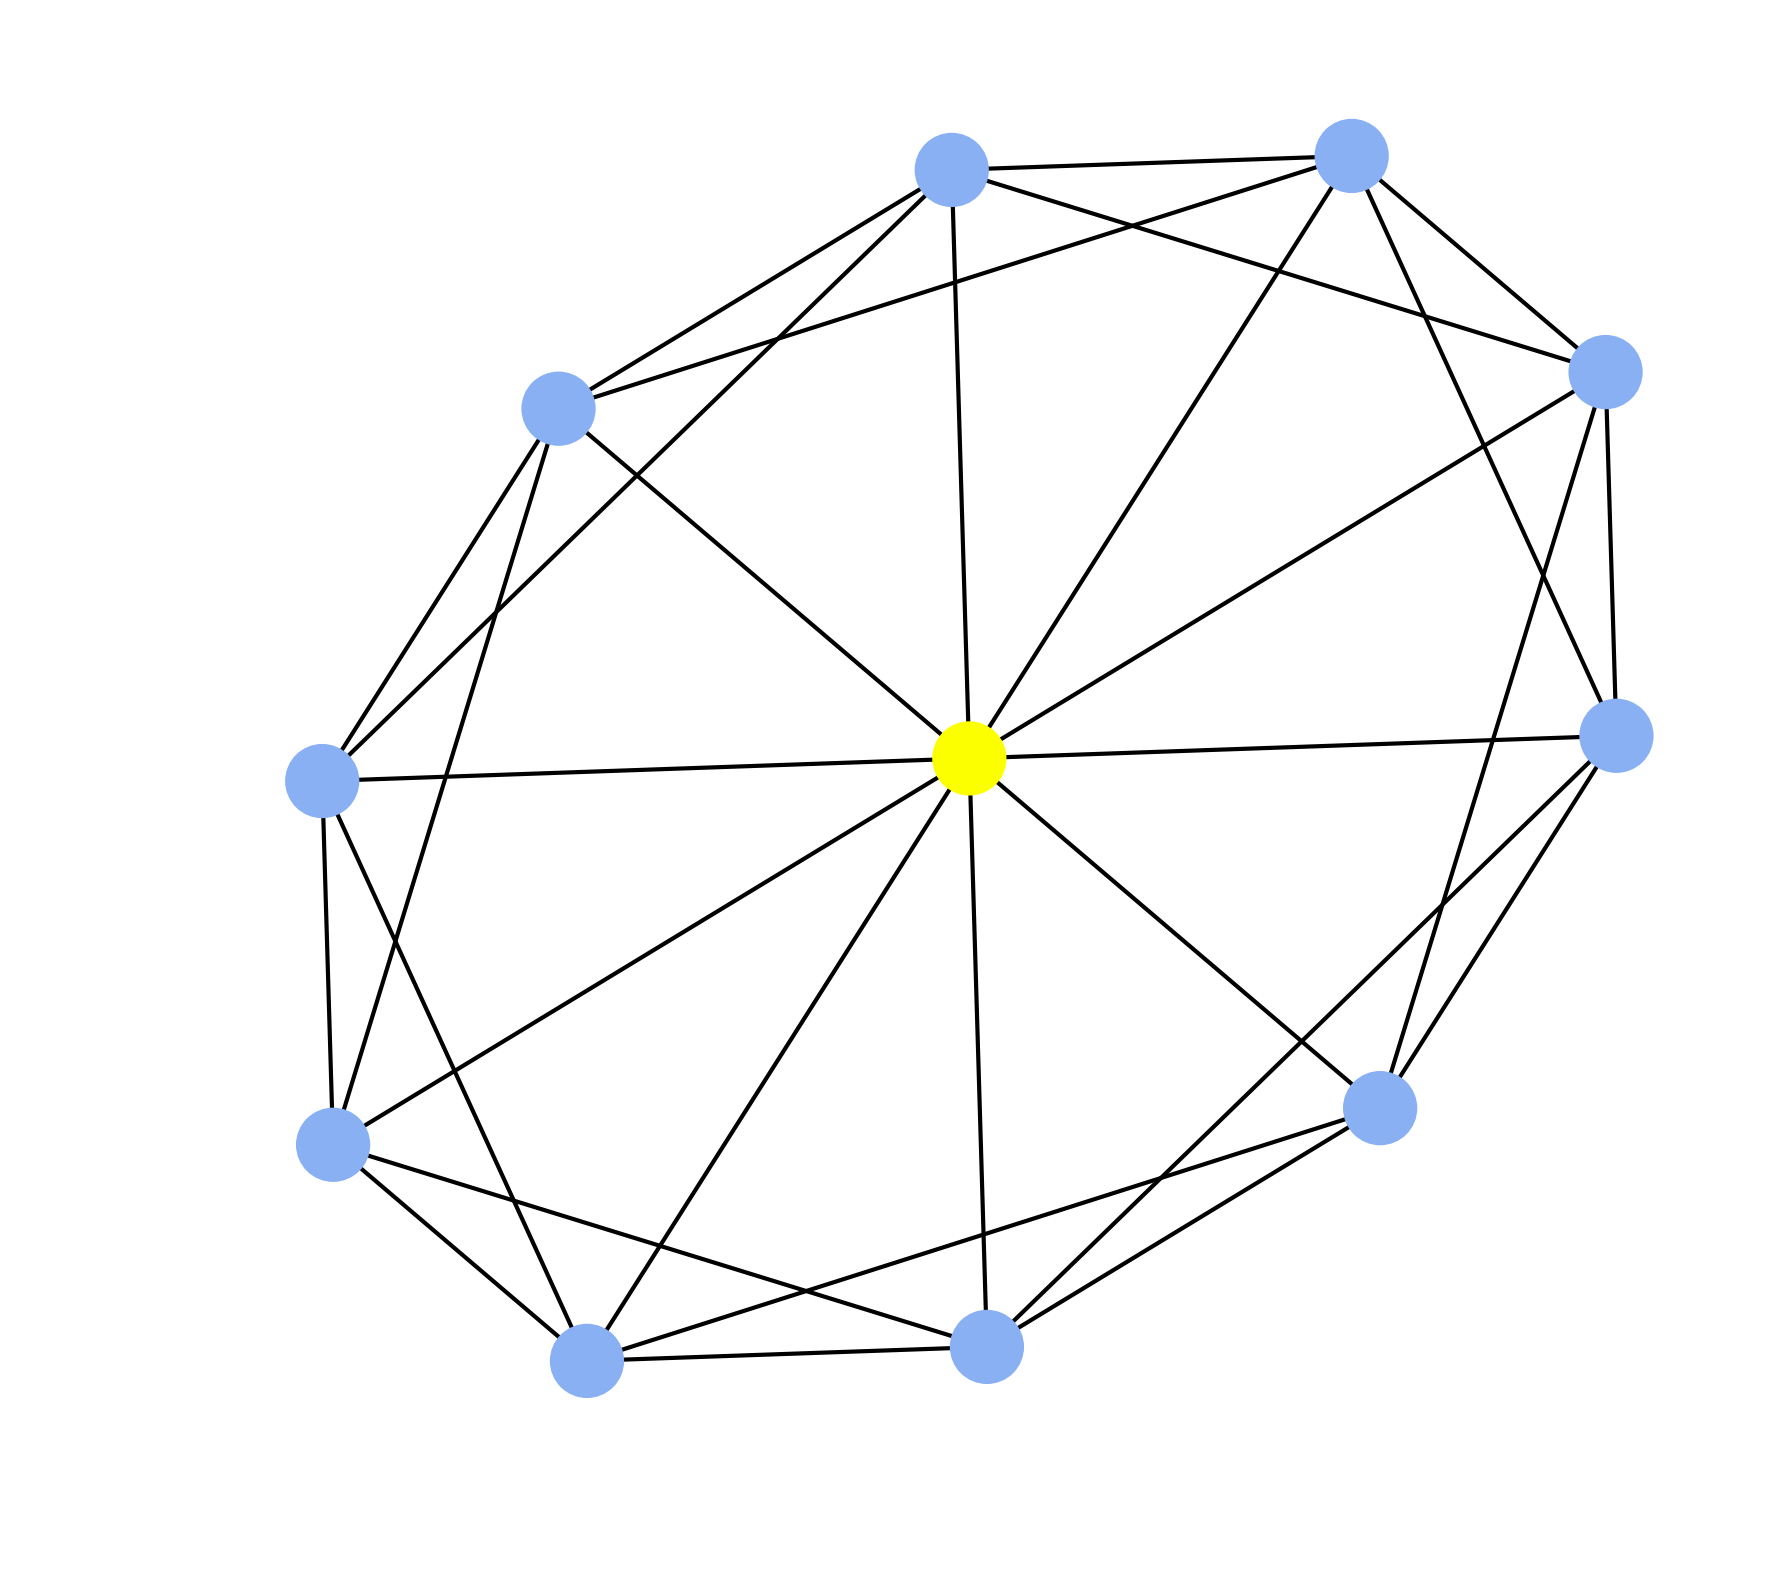

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_spectral(g, node_color=color, ax=ax)
ax.set_axis_off()